In [1]:
%pip install mediapipe

INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 50.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 25.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.12.0.88
    Uninstalling opencv-contrib-python-4.12.0.88:
      Successfully uninstalled opencv-contrib-python-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 re

In [2]:
# From the Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yousefdotpy/karsl-502")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/karsl-502


In [3]:
import pandas as pd
import numpy as np
import mediapipe as mp

2025-12-12 03:20:50.702038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765509651.221989      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765509651.349851      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# My cleaned dataset
df = pd.read_excel('/kaggle/input/karsl-502-labels/KARSL-502_Labels.xlsx')

In [6]:
df

,ClassIndex,SignFolder,SignID,Sign-Arabic,Sign-English
0,0,71,71,هيكل عظمي,Skeleton
1,1,72,72,جمجة,skull
2,2,73,73,عمود فقري,Backbone
3,3,74,74,قفص صدري,Chest
4,4,75,75,جهاز تنفسي,Respiratory device
...,...,...,...,...,...
126,126,468,468,مترجم لغة الإشارة,Sign language translator
127,127,496,496,صيدلي,pharmacist
128,128,497,497,طبيب,doctor
129,129,498,498,ممرضة,nurse


In [7]:
df['SignFolder'] = df['SignFolder'].astype(str).str.zfill(4)
#df.set_index('ClassIndex', inplace = True) #this caused error when creating folder_to_class
df

,ClassIndex,SignFolder,SignID,Sign-Arabic,Sign-English
0,0,0071,71,هيكل عظمي,Skeleton
1,1,0072,72,جمجة,skull
2,2,0073,73,عمود فقري,Backbone
3,3,0074,74,قفص صدري,Chest
4,4,0075,75,جهاز تنفسي,Respiratory device
...,...,...,...,...,...
126,126,0468,468,مترجم لغة الإشارة,Sign language translator
127,127,0496,496,صيدلي,pharmacist
128,128,0497,497,طبيب,doctor
129,129,0498,498,ممرضة,nurse


In [8]:
folder_to_class = dict(zip(df['SignFolder'], df['ClassIndex']))
folder_to_class

{'0071': 0,
 '0072': 1,
 '0073': 2,
 '0074': 3,
 '0075': 4,
 '0076': 5,
 '0077': 6,
 '0078': 7,
 '0079': 8,
 '0080': 9,
 '0081': 10,
 '0082': 11,
 '0083': 12,
 '0084': 13,
 '0085': 14,
 '0086': 15,
 '0087': 16,
 '0088': 17,
 '0089': 18,
 '0090': 19,
 '0091': 20,
 '0092': 21,
 '0093': 22,
 '0094': 23,
 '0095': 24,
 '0096': 25,
 '0097': 26,
 '0098': 27,
 '0099': 28,
 '0100': 29,
 '0101': 30,
 '0102': 31,
 '0103': 32,
 '0104': 33,
 '0105': 34,
 '0106': 35,
 '0107': 36,
 '0108': 37,
 '0109': 38,
 '0110': 39,
 '0111': 40,
 '0112': 41,
 '0113': 42,
 '0114': 43,
 '0115': 44,
 '0116': 45,
 '0117': 46,
 '0118': 47,
 '0119': 48,
 '0120': 49,
 '0121': 50,
 '0122': 51,
 '0123': 52,
 '0124': 53,
 '0125': 54,
 '0126': 55,
 '0127': 56,
 '0128': 57,
 '0129': 58,
 '0130': 59,
 '0131': 60,
 '0132': 61,
 '0133': 62,
 '0134': 63,
 '0135': 64,
 '0136': 65,
 '0137': 66,
 '0138': 67,
 '0139': 68,
 '0140': 69,
 '0141': 70,
 '0142': 71,
 '0143': 72,
 '0144': 73,
 '0145': 74,
 '0146': 75,
 '0147': 76,
 '0148': 

In [9]:
import os, random

In [10]:
signers = ['01', '02', '03'] #3 signers
splitting = ['train', 'test']

chosen_sign = random.choice(df['SignFolder'].tolist()) #convert series to list then pass it to random.choice function
record = df[df['SignFolder'] == chosen_sign].iloc[0] #this filters and retrieve the only row in dataset which equals to the chosen sign then is passed to df with iloc[0] which creates a series

print('Chosen sign folder:', chosen_sign)
print('Class index:', record['ClassIndex'])
print('Sign folder:', record['SignFolder'])
print('Arabic:', record['Sign-Arabic'])
print('English:', record['Sign-English'])

Chosen sign folder: 0101
Class index: 30
Sign folder: 0101
Arabic: تحليل دم
English: blood analysis


In [11]:
from glob import glob #this is used to search for files in a folder/matching a pattern

#find all repetition folders for the chosen sign
karsl_path = '/kaggle/input/karsl-502'
sample = []

#NOTE !!! under each signer folder another signer folder! example: 01/01/train
for signer in signers:
    for split in splitting:
        base_path = os.path.join(karsl_path, signer, signer, split, chosen_sign) #2 signer!
        if os.path.isdir(base_path):
            for rep in os.listdir(base_path):
                rep_path = os.path.join(base_path, rep)
                if os.path.isdir(rep_path):
                    sample.append((signer, split, rep_path)) #appending to sample list

print('Found', len(sample), 'repetitions for this sign') #should be 50 for each signer
if len(sample) == 0:
    print('No repetitions found for', chosen_sign)
else:
    #choose one repetition at random
    signer, split, rep_path = random.choice(sample)
    print(f"Signer {signer}, split {split}")
    print('Repetition folder:', rep_path)

    #get frames // all are .jpg in the dataset
    frame_paths = sorted(glob(os.path.join(rep_path, '*.jpg')))
    print('Number of frames in this repetition:', len(frame_paths))

Found 150 repetitions for this sign
Signer 01, split train
Repetition folder: /kaggle/input/karsl-502/01/01/train/0101/03_01_0101_(24_11_16_18_05_51)_c
Number of frames in this repetition: 47


Showing 10 frames or less


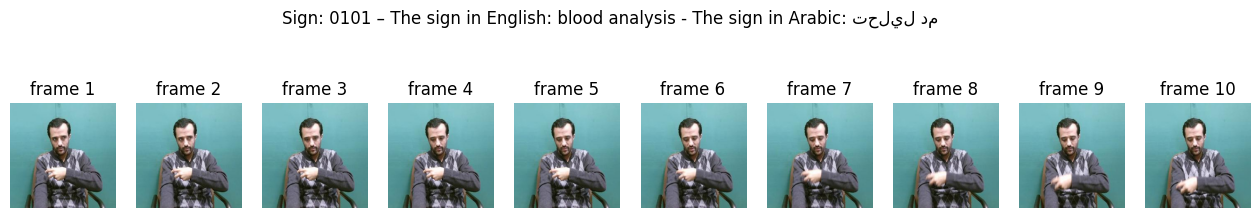

In [12]:
import matplotlib.pyplot as plt
import cv2


#show 10 frames only from this repetition or less if it does not contain 10 frames for checking
print('Showing 10 frames or less')
f_show = min(10, len(frame_paths))

plt.figure(figsize = (16, 3))

for i in range(f_show):
    img = cv2.imread(frame_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, f_show, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"frame {i+1}")

#arabic text is damaged - not fully supported by matplotlib
plt.suptitle(f"Sign: {chosen_sign} – The sign in English: {record['Sign-English']} - The sign in Arabic: {record['Sign-Arabic']}")
plt.show()

In [13]:
!git clone https://github.com/tinh2044/SignBart.git
%cd SignBart
!ls

Cloning into 'SignBart'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 49 (delta 28), reused 49 (delta 28), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 429.77 KiB | 11.62 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/kaggle/working/SignBart
attention.py	  dataset.py  images	 model.py	   scripts
augmentations.py  decoder.py  layers.py  README.MD	   utils.py
configs		  encoder.py  main.py	 requirements.txt


In [14]:
!ls /kaggle/input/karsl-502/02/02/train/0071


'03_02_0071_(12_12_16_15_54_54)_c'  '03_02_0071_(12_12_16_15_56_26)_c'
'03_02_0071_(12_12_16_15_54_58)_c'  '03_02_0071_(21_11_16_15_33_40)_c'
'03_02_0071_(12_12_16_15_55_01)_c'  '03_02_0071_(21_11_16_15_33_44)_c'
'03_02_0071_(12_12_16_15_55_09)_c'  '03_02_0071_(21_11_16_15_33_52)_c'
'03_02_0071_(12_12_16_15_55_13)_c'  '03_02_0071_(21_11_16_15_33_56)_c'
'03_02_0071_(12_12_16_15_55_17)_c'  '03_02_0071_(21_11_16_15_34_00)_c'
'03_02_0071_(12_12_16_15_55_20)_c'  '03_02_0071_(21_11_16_15_34_04)_c'
'03_02_0071_(12_12_16_15_55_24)_c'  '03_02_0071_(21_11_16_15_34_08)_c'
'03_02_0071_(12_12_16_15_55_28)_c'  '03_02_0071_(21_11_16_15_34_11)_c'
'03_02_0071_(12_12_16_15_55_32)_c'  '03_02_0071_(21_11_16_15_34_15)_c'
'03_02_0071_(12_12_16_15_55_36)_c'  '03_02_0071_(21_11_16_15_34_19)_c'
'03_02_0071_(12_12_16_15_55_44)_c'  '03_02_0071_(21_11_16_15_34_23)_c'
'03_02_0071_(12_12_16_15_55_47)_c'  '03_02_0071_(21_11_16_15_34_27)_c'
'03_02_0071_(12_12_16_15_55_55)_c'  '03_02_0071_(21_11_16_15_34_31)_c'
'03_02

In [15]:
import pickle #save and load Python objects like: dictionaries, lists, numpy arrays, etc..
import json #save text-based structure 
from tqdm import tqdm #tqdm is a useful tools used in Python for long loops - taken from تقدم - show progressing

KARSL_ROOT = karsl_path
OUT_ROOT = '/kaggle/working/karsl_medical_emergencies_signbart'

#adding directories to the kaggle/working folder
for split_name in ['train', 'val', 'test']:
    os.makedirs(os.path.join(OUT_ROOT, split_name), exist_ok = True)


#label2id.json and id2label.json for dataset in SignBart
label2id = {fol: int(cla) for fol, cla in folder_to_class.items()}
id2label = {str(cla): fol for fol, cla in folder_to_class.items()}

#'w' is for creating / writing when openning the json file
#dump is a built-in function that writes JSON to a file
with open(os.path.join(OUT_ROOT, 'label2id.json'), 'w') as f:
    json.dump(label2id, f)

with open(os.path.join(OUT_ROOT, 'id2label.json'), 'w') as f:
    json.dump(id2label, f)

print('Saved label2id.json and id2label.json at', OUT_ROOT, 'successfully :)')

Saved label2id.json and id2label.json at /kaggle/working/karsl_medical_emergencies_signbart successfully :)


In [28]:
#Holistic is a module in mediapipe that detects: body pose (33 joints) - left hand (21 joints) - right hand (21 joints) and face (but we do not need this)
#mp_holistic = mp.solutions.holistic

def extract_keypoints(image, pose, hands):
    '''
    This function takes RGB frame and extract 75 landmarks/joints 
    it returns shape as (75, 2) array ,, 33 pose + 21 left hand + 21 right hand = 75 ,, 2 as each has (x,y) coordinates
    coordinates are normalized to [0,1] as Mediapipe style
    '''

    #image shape: height, width, and color (default color for OpenCV is BGR) ,,  so ignore it > (_)
    #Mediapipe requires RGB
    h, w, _ = image.shape
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #covert to RGB

    #MediaPipe 2 models // HOLISTIC took too long
    pose_results = pose.process(img_rgb)
    hands_results = hands.process(img_rgb)
    
    #body pose landmarks
    pose_xy = np.zeros((33, 2), dtype = np.float32) #create empty array
    if pose_results.pose_landmarks: #if mediapipe detects the pose
        for i, lm in enumerate(pose_results.pose_landmarks.landmark): #loop for every joint
                pose_xy[i, 0] = lm.x #filling
                pose_xy[i, 1] = lm.y #filling

    left_hand_xy  = np.zeros((21, 2), dtype = np.float32)
    right_hand_xy = np.zeros((21, 2), dtype = np.float32)

    if hands_results.multi_hand_landmarks and hands_results.multi_handedness:
        for hand_landmarks, handedness in zip(hands_results.multi_hand_landmarks, hands_results.multi_handedness):
            hand_label = handedness.classification[0].label  #left or right
            
            hand_xy = np.array([[lm.x, lm.y] for lm in hand_landmarks.landmark], dtype = np.float32)
            
            if hand_label == 'Left':
                left_hand_xy = hand_xy
            else:
                right_hand_xy = hand_xy

    keypoints = np.concatenate([pose_xy, left_hand_xy, right_hand_xy], axis = 0)  #total of 75 > SignBart expect (75, 2)
    return keypoints
    

In [ ]:
'''
    #left hand landmarks
    left_hand = np.zeros((21, 2), dtype = np.float32) #create empty array
    if hands_results.left_hand_landmarks: #if mediapipe detects left hand
        for i, lm in enumerate(hands_results.left_hand_landmarks.landmark): #loop for every joint
            if i < 21:
                left_hand[i] = [lm.x, lm.y] #filling the array

    #right hand landmarks
    right_hand = np.zeros((21, 2), dtype = np.float32) #create empty array
    if results.right_hand_landmarks: #if mediapipe detects right hand
        for i, lm in enumerate(results.right_hand_landmarks.landmark): #loop for every joint
            if i < 21:
                right_hand[i] = [lm.x, lm.y] #filling the array
'''

In [29]:
def repetition(rep_path, pose, hands):
    '''
    This function reads all frames in one repetition (each signer has made 50 repetition) , a repetition contains many frames
    rep_path is the path to one repetition folder containing the (.jpg) frames
    returns np.array of shape (T, 75, 2) as T is number of frames ,, or returns None if no valid frames (something could of went wrong)
    holistic is a pre-created model 
    '''
    frame_files = sorted([f for f in os.listdir(rep_path) if f.lower().endswith('.jpg')]) #all frames are .jpg so this is just for ensuring

    if len(frame_files) == 0: #no valid frames in the repetition
        return None
    
    seq = [] #sequence that holds all frames' extractd 75 keypoints

    for frame_name in frame_files:
        frame_path = os.path.join(rep_path, frame_name)
        
        img = cv2.imread(frame_path)
        if img is None: #if no image to read > skip
            continue
            
        keypoints = extract_keypoints(img, pose, hands) #pass the image and the model to extract_keypoints function
        seq.append(keypoints) #stack it to the sequence
            
    if len(seq) == 0: #if all frames fails to be detected by mediapipe
        return None

    return np.stack(seq, axis = 0)  #this conver the sequence holding all frames individually to (T, 75, 2) as T is number of frames - This represent one sample in the dataset :)

In [30]:
def split_target(original_split, signer):
    '''
    The KArSL original split is: for each signer a train and test folders
    As we will be training the model on train folders of signers 01 and 02 and validation will be conducted on train folder of signer 03
    Testing will be on test folders of all 3 signers (details of this process will be explained later on :)
    
    MAP KArSL split TO our target split
    train of signers 01/02 > train
    train of signer 03 > val
    test of all signers > test
    '''
    if original_split == 'train':
        if signer in ['01', '02']:
            return 'train'
        elif signer == '03':
            return 'val'
        else:
            return None #safety check
    elif original_split == 'test':
        return 'test'
    else:
        return None #safety check

In [31]:
os.environ["GLOG_minloglevel"] = "2"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [32]:
import time

def backup_zip():
    ts = time.strftime("%Y%m%d_%H%M%S")
    zip_name = f"karsl_backup_{ts}.zip"
    cmd = f"cd /kaggle/working && zip -r {zip_name} karsl_medical_emergencies_signbart"
    os.system(cmd)
    print(f"\nBackup created: /kaggle/working/{zip_name}\n")


In [40]:
MAX_TRAIN_REPETITION = 10 #50 repetitions is taking too long :(


total_samples = 0 #counter for .pkl files created (each repetition is saved as .pkl for SignBart)
skip_empty = 0 #counter for skipped signs (repetition) that encountered issues (no frames or mediapipe failure maybe)
skip_not_in_subset = 0 #counter for signs ignored because they are not in our subset for medical emergencies


mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands


#creating only one Holistic model per repetition as it is a slow process. However processing images is fast so we can use this model for all frames (time efficiency)
#with mp_holistic.Holistic(static_image_mode = True) as holistic: #static_image_mode is True means that NO tracking betweens frames > mediapipe treats each frame independently

# using Pose + Hands instead of Holistic
with mp_pose.Pose(static_image_mode = True) as pose, mp_hands.Hands(static_image_mode = True, max_num_hands = 2) as hands:
    for original_split in splitting: #splitting = ['train', 'test']
        for signer in signers: #signers = ['01', '02', '03']
            target_split = split_target(original_split, signer)
            if target_split is None:
                continue  #just in case

            base_dir = os.path.join(KARSL_ROOT, signer, signer, original_split) #give path like /kaggle/input/karsl-502/signer/signer/train or test
            if not os.path.isdir(base_dir): #safety check
                continue
    
            #print to check
            print(f'\nNow processing signer {signer}, original split {original_split} > target {target_split} ...')
            for sign_folder in tqdm(os.listdir(base_dir)): 
                #only keeping signs in our subset (131 signs from Excel file) / filtering
                if sign_folder not in folder_to_class:
                    skip_not_in_subset += 1 #adding to the ignored signs counter (not included)
                    continue
    
                in_sign_dir = os.path.join(base_dir, sign_folder) #paths to the signs that are included in the subset -  path like /kaggle/input/karsl-502/02/02/train/sign_folder
                if not os.path.isdir(in_sign_dir): #safety check
                    continue
    
                #creating the output directory for the sign
                out_sign_dir = os.path.join(OUT_ROOT, target_split, sign_folder) #path like /kaggle/working/karsl_medical_emergencies_signbart/val/sign_folder
                os.makedirs(out_sign_dir, exist_ok = True)

                all_rep_folders = sorted(os.listdir(in_sign_dir))
                rep_folders = [] #selecting some repetitions not all

                for rf in all_rep_folders:
                    rp = os.path.join(in_sign_dir, rf)
                    if os.path.isdir(rp):
                        rep_folders.append(rf)

                #limiting train repetations but keeping all test repetitions
                if original_split == 'train':
                    rep_folders = rep_folders[:MAX_TRAIN_REPETITION]
                
                #each subfolder is one repetition - looping through repetition folders /10 rep after change - cearting .pkl files
                for rep_folder in rep_folders:
                    rep_path = os.path.join(in_sign_dir, rep_folder) #example: /kaggle/input/karsl-502/02/02/train/0071/03_02_0071_(12_12_16_15_54_54)_c
                    if not os.path.isdir(rep_path): #safety check
                        continue

                    out_name = f'{signer}_{rep_folder}.pkl'
                    out_path = os.path.join(out_sign_dir, out_name)
                    
                    if os.path.exists(out_path):
                        continue  # already done, skip

                    #skeleton_seq = repetition(rep_path, holistic) #extracting skeleton sequence for this repetition
                    skeleton_seq = repetition(rep_path, pose, hands)
                    if skeleton_seq is None: #skipped if there is NO frames or mediapipe failed for any reason
                        skip_empty += 1 #adding to the skipped signs counter due to issues
                        continue
    
                    #this dictionary will be saved as .pkl file
                    sample = {
                        "keypoints": skeleton_seq, #full skeleton sequence returned from repetition function (T, 75, 2)
                        "class": sign_folder #the class label, example: 0072
                    }
    
                    out_name = f'{signer}_{rep_folder}.pkl'
                    out_path = os.path.join(out_sign_dir, out_name) #example something like this: karsl_medical_signbart/train/0072/02_03_02_0072_(..).pkl
                    #'wb' is write mode (overwrite if exist) however it differes from 'w' as it is for Binary mode
                    #Binary mode / representation is necessary for numpy arrays as there are not just text + SignBart expects (.pkl) binary files
                    with open(out_path, 'wb') as f:
                        pickle.dump(sample, f)
                        
                    total_samples += 1 #adding to the samples/repetition
    
                    #just tracking progress
                    if total_samples % 100 == 0:
                        print('Saved samples so far:', total_samples)

print('\nDone building processed dataset! :)')
print('Total saved samples is:  ', total_samples)
print('Skipped repetitions (due to an issue of frames existence or Mediapip): ', skip_empty)
print('Skipped sign folders that are not in our subset:  ', skip_not_in_subset)
print('Output dataset root:  ', OUT_ROOT)


Now processing signer 01, original split train > target train ...


  0%|          | 0/502 [00:00<?, ?it/s]W0000 00:00:1765510420.846746     149 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1765510420.875624     147 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1765510420.877186     145 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1765510420.937371     144 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  7%|▋         | 35/502 [08:58<2:45:01, 21.20s/it]

Saved samples so far: 100


 15%|█▍        | 74/502 [18:05<1:54:11, 16.01s/it]

Saved samples so far: 200


 23%|██▎       | 113/502 [27:46<2:01:31, 18.74s/it]

Saved samples so far: 300


 30%|███       | 153/502 [37:53<1:45:21, 18.11s/it]

Saved samples so far: 400


 39%|███▊      | 194/502 [48:29<1:42:32, 19.98s/it]

Saved samples so far: 500


 42%|████▏     | 212/502 [50:49<1:09:31, 14.39s/it]


KeyboardInterrupt: 

In [41]:
!cd /kaggle/working && zip -r karsl_backup_500.zip karsl_medical_emergencies_signbart

  adding: karsl_medical_emergencies_signbart/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/test/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/id2label.json (deflated 72%)
  adding: karsl_medical_emergencies_signbart/label2id.json (deflated 69%)
  adding: karsl_medical_emergencies_signbart/val/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/train/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/train/0102/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_38_08)_c.pkl (deflated 27%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_38_20)_c.pkl (deflated 27%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_38_14)_c.pkl (deflated 26%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_37_50)_c.pkl (deflated 26%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_37_56)_c.

In [42]:
ROOT = "/kaggle/working/karsl_medical_emergencies_signbart"

for split in ["train", "val", "test"]:
    path = os.path.join(ROOT, split)
    count = 0
    if os.path.isdir(path):
        for s in os.listdir(path):
            d = os.path.join(path, s)
            if os.path.isdir(d):
                count += len([f for f in os.listdir(d) if f.endswith(".pkl")])
    print(split, count)

train 545
val 0
test 0


In [44]:
!cd /kaggle/working && zip -r karsl_backup_545.zip karsl_medical_emergencies_signbart

  adding: karsl_medical_emergencies_signbart/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/test/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/id2label.json (deflated 72%)
  adding: karsl_medical_emergencies_signbart/label2id.json (deflated 69%)
  adding: karsl_medical_emergencies_signbart/val/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/train/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/train/0102/ (stored 0%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_38_08)_c.pkl (deflated 27%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_38_20)_c.pkl (deflated 27%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_38_14)_c.pkl (deflated 26%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_37_50)_c.pkl (deflated 26%)
  adding: karsl_medical_emergencies_signbart/train/0102/01_03_01_0102_(04_12_16_14_37_56)_c.

In [47]:
!mkdir -p /kaggle/working/output
!cp /kaggle/working/karsl_backup_545.zip /kaggle/working/output/
!ls /kaggle/working/output

karsl_backup_545.zip


In [ ]:
seq = repetition(rep_path, pose, hands)
print(seq.shape) #should be (T, 75, 2)
print(np.count_nonzero(seq)) #should be greater than 0!